### 14.1 来自Bitly的USA.gov数据

In [3]:
f1 = open('D:\\Jupyter\\利用Python进行数据分析2\\yjx\\Python-\\chapter14\\data\\bitly_usagov\\example.txt')
f1.readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json 
records = [json.loads(line) for line in f1]  #将JSON字符串转换成Python字典对象
records[0]

{'a': 'GoogleMaps/RochesterNY',
 'c': 'US',
 'nk': 0,
 'tz': 'America/Denver',
 'gr': 'UT',
 'g': 'mwszkS',
 'h': 'mwszkS',
 'l': 'bitly',
 'hh': 'j.mp',
 'r': 'http://www.AwareMap.com/',
 'u': 'http://www.monroecounty.gov/etc/911/rss.php',
 't': 1331923249,
 'hc': 1308262393,
 'cy': 'Provo',
 'll': [40.218102, -111.613297]}

In [5]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles']

In [11]:
#对时区进行计数  法一：纯Python
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [7]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [12]:
counts = get_counts(time_zones)
counts['America/New_York']

1250

In [13]:
len(time_zones)

3439

In [14]:
#前10位的时区及其计数值
def top_counts(count_dict,n=10):
    value_key_pairs = [(count,tz)for tz,count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1250, 'America/New_York')]

In [15]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1250),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [16]:
#用pandas对时区进行计数
import pandas as pd

In [17]:
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3559 entries, 0 to 3558
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3439 non-null object
al             3093 non-null object
c              2918 non-null object
cy             2918 non-null object
g              3439 non-null object
gr             2918 non-null object
h              3439 non-null object
hc             3439 non-null float64
hh             3439 non-null object
kw             93 non-null object
l              3439 non-null object
ll             2918 non-null object
nk             3439 non-null float64
r              3439 non-null object
t              3439 non-null float64
tz             3439 non-null object
u              3439 non-null object
dtypes: float64(4), object(14)
memory usage: 500.6+ KB


In [19]:
frame['tz'][:10]

0         America/Denver
1       America/New_York
2      America/Sao_Paulo
3       America/New_York
4       America/New_York
5          Europe/Warsaw
6                       
7                       
8                       
9    America/Los_Angeles
Name: tz, dtype: object

In [20]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1250
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [21]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1250
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

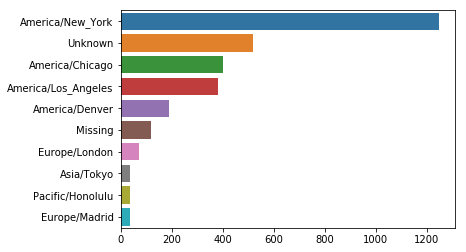

In [23]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index,x=subset.values)

In [24]:
frame['a'][1]

'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; InfoPath.3)'

In [25]:
frame['a'][51][:50]

'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.11 (K'

In [26]:
#将这种字符串的第一节（与浏览器大致对应）分离出来并得到另外一份用户行为摘要
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0    GoogleMaps/RochesterNY
1               Mozilla/4.0
2               Mozilla/5.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [27]:
results.value_counts()[:8]

Mozilla/5.0                 2593
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [28]:
import numpy as np
cframe = frame[frame.a.notnull()]
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')
cframe['os'][:5]

c:\users\yjx\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    Not Windows
1        Windows
2    Not Windows
3        Windows
4        Windows
Name: os, dtype: object

In [29]:
by_tz_os = cframe.groupby(['tz','os'])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [30]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [31]:
counts_subset = agg_counts.take(indexer[-10:])
counts_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [32]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1250.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [33]:
counts_subset = counts_subset.stack()
counts_subset.name = 'total'
counts_subset = counts_subset.reset_index()
counts_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


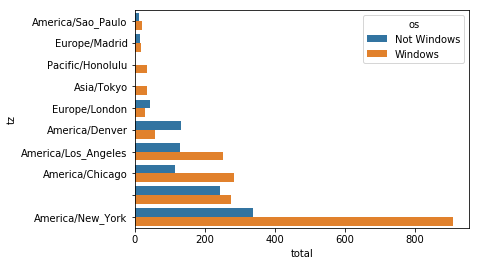

In [34]:
sns.barplot(x='total',y='tz',hue='os',data=counts_subset)

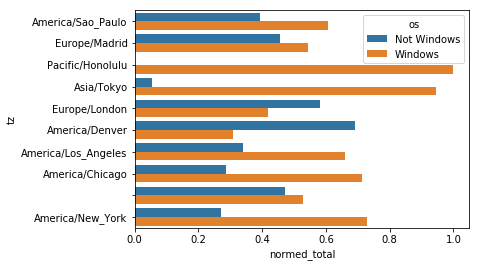

In [38]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group
results = counts_subset.groupby('tz').apply(norm_total)
sns.barplot(x='normed_total',y='tz',hue='os',data=results)

In [39]:
g = counts_subset.groupby('tz')
results2 = counts_subset.total / g.total.transform('sum')
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.271200
19    0.728800
Name: total, dtype: float64